In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [2]:
listings = pd.read_csv('listings.csv')
# reviews = pd.read_csv('reviews.csv')
# calendar = pd.read_csv('calendar.csv')

In [3]:
listings.host_response_rate=listings.host_response_rate.str.replace('%','').astype('float')
listings.price=listings.price.str.replace('[$,.]','').astype('float')/100
#calendar.price=calendar.price.str.replace('[$,.]','').astype('float')/100
listings.host_is_superhost=listings.host_is_superhost.map({'t':1,'f':0}).astype('bool')
listings['price_per_bed']=listings['price']/listings['beds']
listings['price_per_accommodates']=listings['price']/listings['accommodates']

C:\Users\G\AppData\Local\Temp\ipykernel_21336\3161143627.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listings.price=listings.price.str.replace('[$,.]','').astype('float')/100


We can see the dataset contains 3818 listings

In [4]:
listings.shape

(3818, 94)

<Axes: >

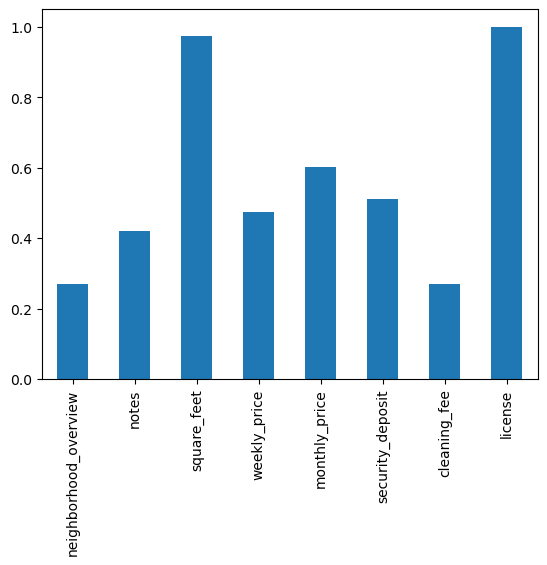

In [5]:
listings_missing = listings.isnull().mean()
listings_missing[listings_missing>0.25].plot.bar()
# columns with a significant amount of missing values

<Axes: >

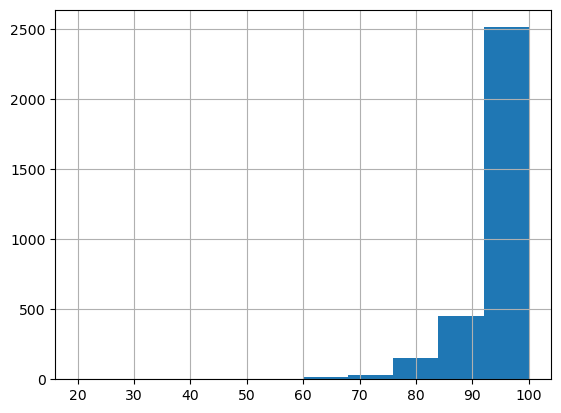

In [6]:
listings.review_scores_rating.hist()

In [7]:
df_hosts= pd.DataFrame(listings.groupby('host_id').id.count()>=3)
listings=listings.merge(df_hosts,on='host_id',how='left')
listings.rename(columns={'id_x':'id','id_y':'professional'}, inplace=True)

## General look at the data

<Axes: >

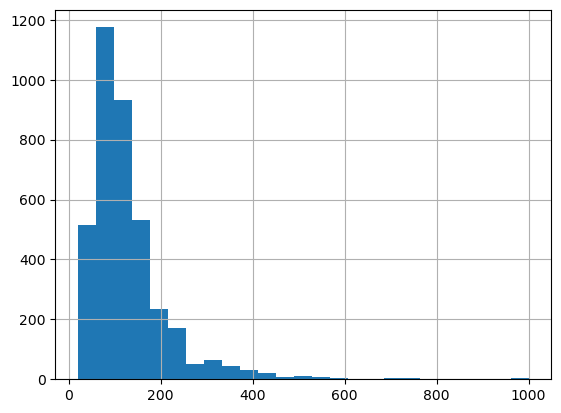

In [8]:
listings.groupby('id')['price'].mean().hist(bins = 25)

In [9]:
listings.groupby('host_id')['host_total_listings_count'].mean().sort_values(ascending=False)

host_id
30283594    502.0
31148752    354.0
4962900     169.0
661691      163.0
103427       84.0
            ...  
11376974      1.0
11358129      1.0
18423248      1.0
1075031       NaN
42515980      NaN
Name: host_total_listings_count, Length: 2751, dtype: float64

In [10]:
listings[listings['price']>=1000]['price']

3122    1000.0
Name: price, dtype: float64

In [11]:
#listings.groupby('id')['price_per_beds'].mean().describe()
listings.groupby('id')['price_per_accommodates'].mean().describe()

count    3818.000000
mean       41.266923
std        20.676221
min         4.750000
25%        27.500000
50%        37.500000
75%        50.000000
max       275.000000
Name: price_per_accommodates, dtype: float64

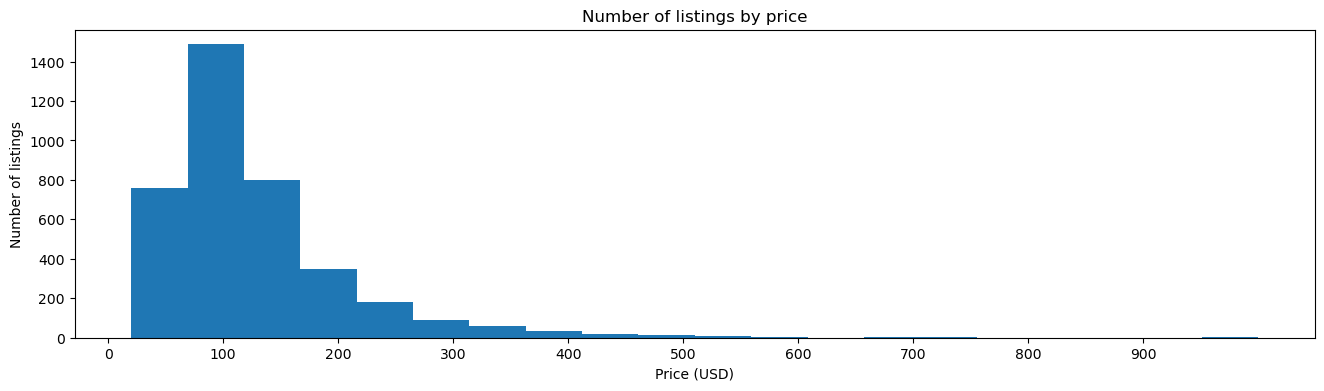

In [12]:
#plot
plt.figure(figsize=(16,4))
plt.hist(listings.groupby('id')['price'].mean(), bins=20)
plt.xticks(np.arange(0, 1000, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price (USD)')
plt.title('Number of listings by price')
plt.savefig('price.png')
plt.show()

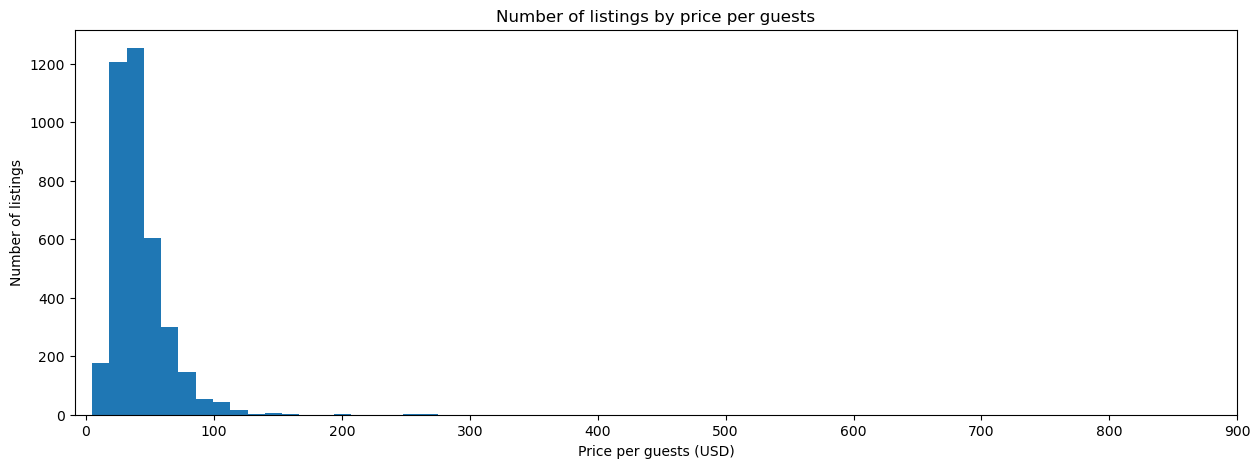

In [13]:
plt.figure(figsize=(15,5))
plt.hist(listings.groupby('id')['price_per_accommodates'].mean(), bins=20)
plt.xticks(np.arange(0, 1000, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price per guests (USD)')
plt.title('Number of listings by price per guests')
plt.savefig('price_per_guests.png')
plt.show()

In [14]:
listings.groupby('neighbourhood_group_cleansed')['price'].agg(['mean','count']).sort_values(by='mean',ascending=False)

,mean,count
neighbourhood_group_cleansed,,
Magnolia,177.672131,61
Queen Anne,157.223729,295
Downtown,154.405660,530
West Seattle,141.359606,203
Cascade,140.101124,89
Capitol Hill,130.592593,567
Central Area,128.338753,369
Ballard,124.682609,230
Other neighborhoods,119.968514,794


<Figure size 1000x500 with 0 Axes>

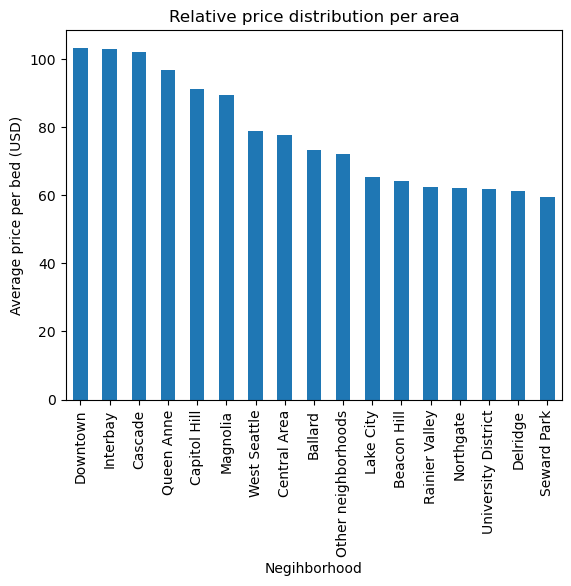

In [15]:
plt.figure(figsize=(10,5))
listings.groupby('neighbourhood_group_cleansed')['price_per_bed'].agg(['mean']).sort_values(by='mean',ascending=False).plot(kind='bar', legend=None)
plt.ylabel('Average price per bed (USD)')
plt.xlabel('Negihborhood')
plt.title('Relative price distribution per area')
plt.savefig('chart_2_price_bed.png')
plt.show;


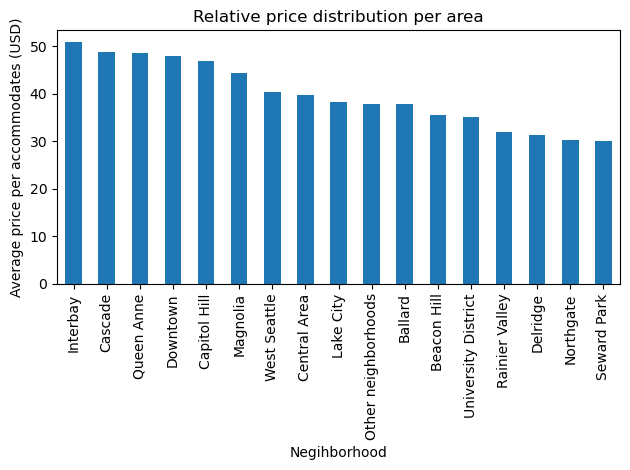

In [16]:
#plt.figure(figsize=(16,5))
listings.groupby('neighbourhood_group_cleansed')['price_per_accommodates'].agg(['mean']).sort_values(by='mean',ascending=False).plot(kind='bar', legend=None)
plt.ylabel('Average price per accommodates (USD)')
plt.xlabel('Negihborhood')
plt.title('Relative price distribution per area')
plt.tight_layout()
plt.savefig('chart_3_price_accommodates.png')
plt.show;


In [17]:
listings.groupby('neighbourhood_group_cleansed')['price_per_bed'].agg(['mean','count']).sort_values(by='mean',ascending=False)

,mean,count
neighbourhood_group_cleansed,,
Downtown,103.301539,530
Interbay,102.909091,11
Cascade,102.086142,89
Queen Anne,96.848878,295
Capitol Hill,91.282321,567
Magnolia,89.441335,61
West Seattle,78.830167,203
Central Area,77.767397,369
Ballard,73.265704,230


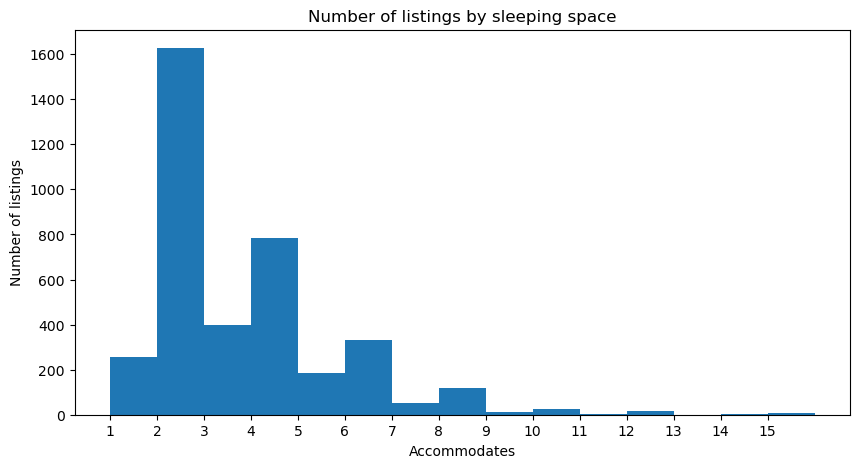

In [18]:
plt.figure(figsize=(10,5))
plt.hist(listings.accommodates, bins=15)
plt.xticks(np.arange(1, 16, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Accommodates')
plt.title('Number of listings by sleeping space')
plt.savefig('chart_1_accommodates_count.png')
plt.show;

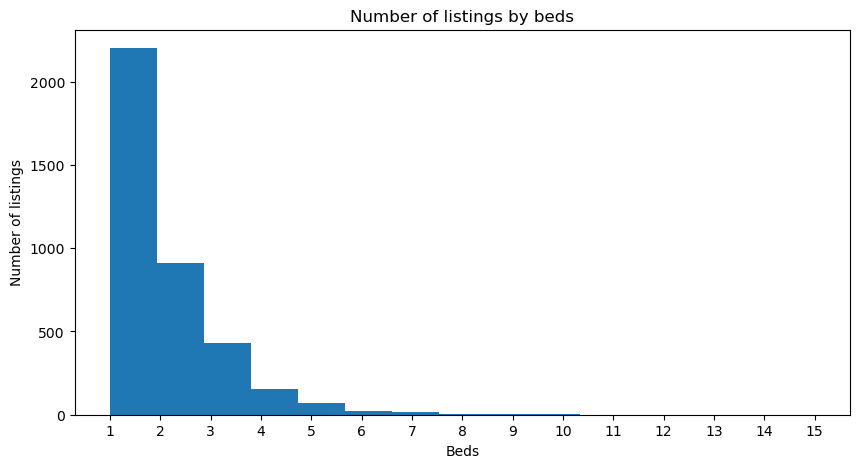

In [19]:
plt.figure(figsize=(10,5))
plt.hist(listings.beds, bins=15)
plt.xticks(np.arange(1, 16, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Beds')
plt.title('Number of listings by beds')
plt.show;

## How the review scores influence the booking frequency?

In [20]:
listings['review_scores_rating'].describe()

count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

<Figure size 1000x500 with 0 Axes>

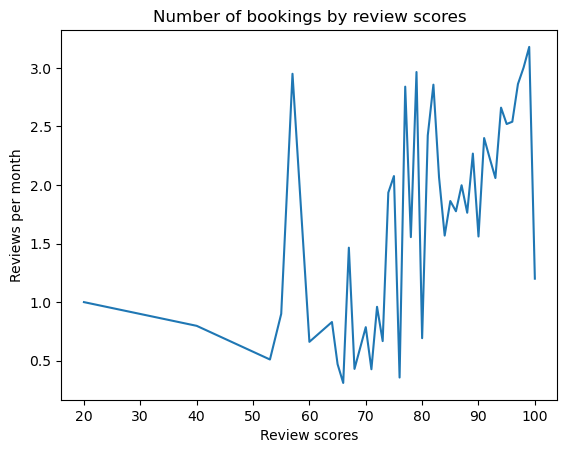

In [21]:
plt.figure(figsize=(10,5))
listings.groupby('review_scores_rating').agg({'reviews_per_month':['mean']}).plot(legend=None)
plt.ylabel('Reviews per month')
plt.xlabel('Review scores')
plt.title('Number of bookings by review scores')
plt.savefig('chart_4_bookings_per_review.png')
plt.show;

## Is it beneficial to choose or become a "superhost"?

In [22]:
listings.groupby('host_is_superhost').agg({'reviews_per_month':['mean'],'price':'mean','review_scores_rating':'mean'})

,reviews_per_month,price,review_scores_rating
,mean,mean,mean
host_is_superhost,,,
False,1.804770,127.391376,93.652893
True,2.969627,130.253846,97.395473


## Should you manage your Airbnb apartment personally, or is it more advantageous to enlist the services of a 'professional' Airbnb apartment manager?

In [23]:
listings.groupby('professional').agg({'reviews_per_month':['mean'],'price':'mean','review_scores_rating':'mean','accommodates':'mean'})

,reviews_per_month,price,review_scores_rating,accommodates
,mean,mean,mean,mean
professional,,,,
False,2.119198,126.718652,94.973373,3.230636
True,1.960124,131.831736,93.263354,3.713525


<Figure size 1000x1000 with 0 Axes>

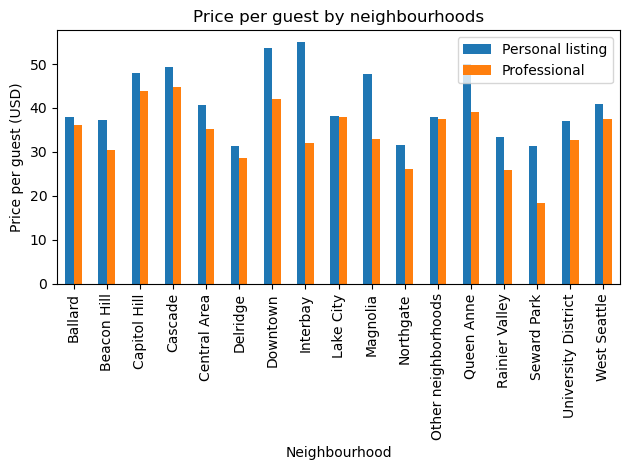

In [24]:
plt.figure(figsize=(10,10))
listings.groupby(['neighbourhood_group_cleansed','professional']).agg({'price_per_accommodates':'mean'}).unstack().plot(kind='bar')
plt.ylabel('Price per guest (USD)')
plt.xlabel('Neighbourhood')
plt.title('Price per guest by neighbourhoods')
plt.legend(['Personal listing','Professional'], loc=1)
plt.tight_layout()
plt.savefig('chart_5_price_per_area_professional.png')
plt.show;

